### 데이터 불러오기

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family="AppleGothic")

In [8]:
df_last = pd.read_csv("Data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv", encoding="cp949")
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841


In [9]:
df_first = pd.read_csv("Data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", encoding="cp949")
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


### 데이터 핸들링 (데이터 형 맞추기, 합치기)

In [17]:
# 1. df_last 수정 
## 1-1) 평당분양가격 만들기
## 1-2) 전용면적 만들기
## 1-3) 초과,이하 단어 제거하고 ~로 표시하기
## 1-4) 필요없는 행 제거

# 2. df_first 수정
## 2-1) melt 
## 2-2) 컬럼명 변경 
## 2-3) 기간= 년, 월 나누는 함수 만들기

# 3. 두개의 Dataframe의 필요컬럼만 남기기 (지역명, 연도, 월, 평당분양가격)
# 4. Concat으로 합치기

In [15]:
# 1-1) 
# 평당분양가격 = 분양가격 * 3.3 
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors='coerce')
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7
...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0,12810.6
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0,12863.4
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,NaN


In [26]:
# 1-2)
# 규모구분 -> 전용면적 colname 변경
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적","")

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [ ]:
# 1-3)
# 전용면적 초과, 이하 단어 제거하고 ~로 표시하기
df_last["전용면적"] = df_last["전용면적"].str.replace("초과","~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하","")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ","").str.strip()
df_last["전용면적"]

In [28]:
# 1-4) 
# 필요없는 행 제거
df_last.drop(["규모구분", "분양가격(㎡)"], axis=1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


In [32]:
# 2-1)
# melt 
df_first_melt = df_first.melt(id_vars="지역", var_name="기간", value_name="평당분양가격")

In [34]:
# 2-2)
# 컬럼명 변경
df_first_melt.columns = ["지역명", "기간", "평당분양가격"]

In [38]:
# 2-3)
# 기간= 년, 월 나누는 함수 만들기
date = "2013년12월"

'2013'

In [39]:
date.split("년")[0]

'2013'

In [40]:
date.split("년")[-1].replace("월","")

'12'

In [41]:
def parse_year(date) :
    year = date.split("년")[0]
    year = int(year)
    return year

parse_year(date)

2013

In [43]:
def parse_month(date) :
    month = date.split("년")[-1].replace("월","")
    month = int(month)
    return month

parse_month(date)

12

In [44]:
df_first_melt["연도"] = df_first_melt["기간"].apply(parse_year)

In [45]:
df_first_melt["월"] = df_first_melt["기간"].apply(parse_month)

In [47]:
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [48]:
# 3 필요 컬럼만 남기기 (지역명, 연도, 월, 평당분양가격)
df_last.columns.to_list()

['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격', '전용면적']

In [50]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [55]:
df_last_prepare = df_last.loc[df_last["전용면적"] == "전체",cols].copy()#df_first는 전체전용면적만 나타내기 때문
df_last_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3


In [57]:
df_first_prepare = df_first_melt[cols].copy()
df_first_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189


In [58]:
# 4. Concat으로 합치기
df = pd.concat([df_first_prepare,df_last_prepare])
df.shape

(1224, 4)

In [60]:
df["연도"].value_counts(sort=False)

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: 연도, dtype: int64

### 데이터 시각화

In [65]:
# 1. Pivot table 사용하기
t = pd.pivot_table(df, index="연도", columns="지역명", values="평당분양가격").round()
t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


<AxesSubplot:xlabel='지역명', ylabel='연도'>

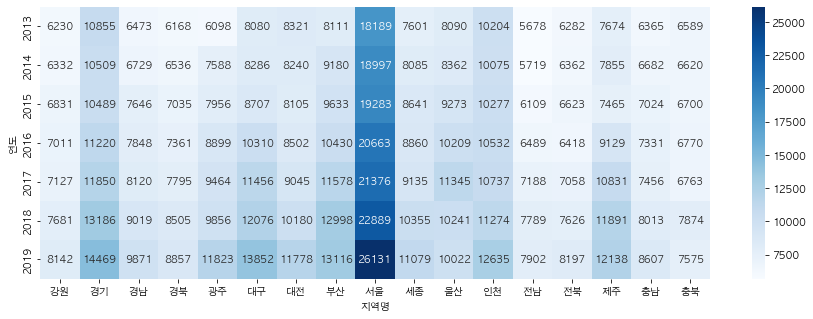

In [72]:
# 2. heatmap 사용하기
plt.figure(figsize=(15,5))
sns.heatmap(t, cmap="Blues", annot=True, fmt="0.0f")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

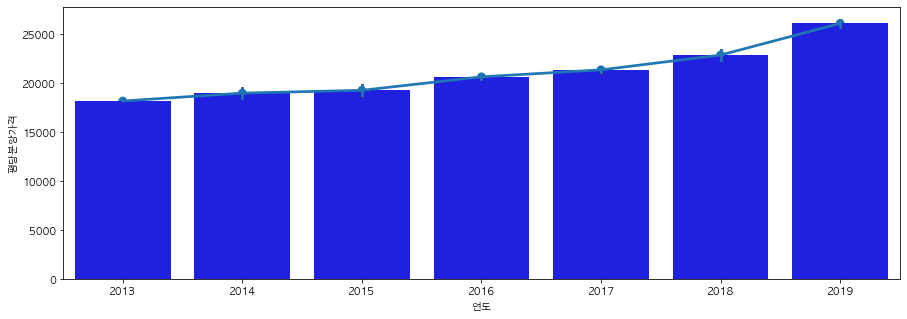

In [80]:
# 3. 서울만 barplot으로 그리기
df_seoul = df[df["지역명"]=="서울"].copy()
plt.figure(figsize=(15,5))
sns.barplot(data=df_seoul, x="연도", y="평당분양가격", color="b")
sns.pointplot(data=df_seoul, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

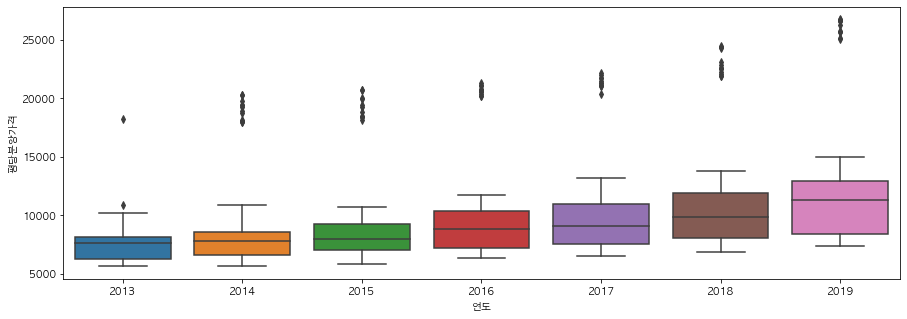

In [81]:
# 4. 연도별 평당분양가격 boxplot, boxenplot 그리기
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x="연도", y="평당분양가격")

<Figure size 1080x360 with 0 Axes>

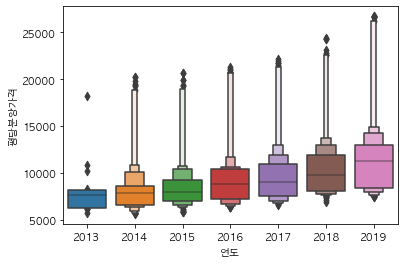

<Figure size 1080x360 with 0 Axes>

In [82]:
sns.boxenplot(data=df, x="연도", y="평당분양가격")
plt.figure(figsize=(15,5))

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

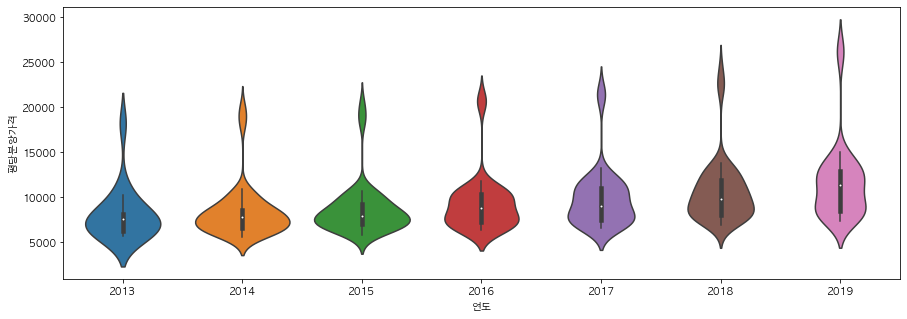

In [84]:
# 5. 연도별 평당분양가격 violinplot 그리기
plt.figure(figsize=(15,5))
sns.violinplot(data=df, x="연도", y="평당분양가격")

/Users/gusungju/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gusungju/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gusungju/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gusungju/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gusungju/opt/anaconda3/lib/python3.9/

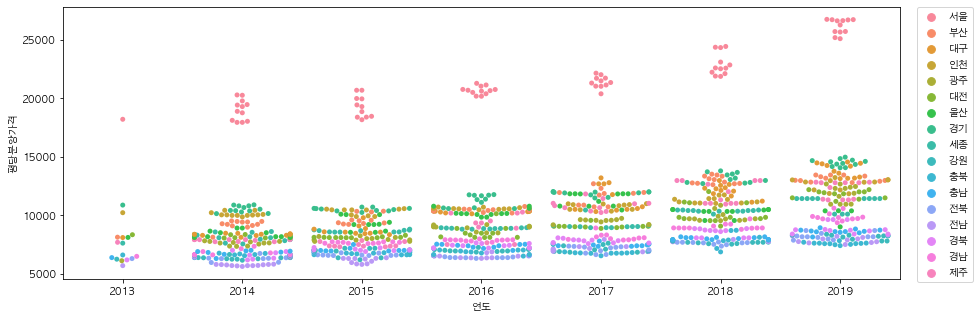

In [85]:
# 6. 연도별 평당분양가격 swarmplot 그리기
plt.figure(figsize=(15,5))
sns.swarmplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad=0.)

/Users/gusungju/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 30.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gusungju/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gusungju/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 28.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gusungju/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gusungju/opt/anaconda3/lib/python3.9/

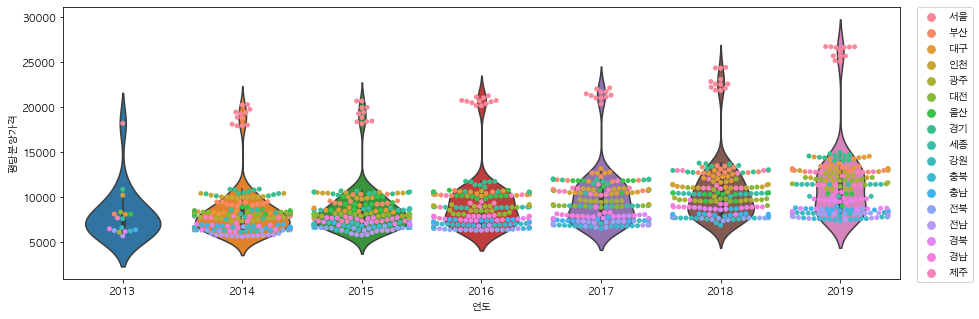

In [86]:
plt.figure(figsize=(15,5))
sns.violinplot(data=df, x="연도", y="평당분양가격")
sns.swarmplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad=0.)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

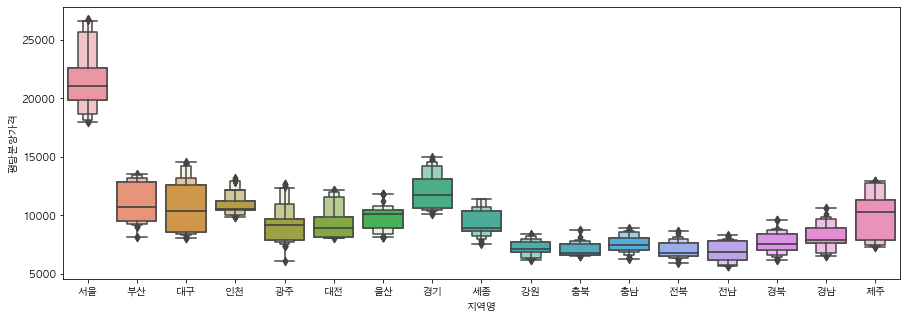

In [88]:
# 7. 지역별 평당분양가격 barplot,boxenplot 그리기
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x="지역명", y="평당분양가격")
sns.boxenplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

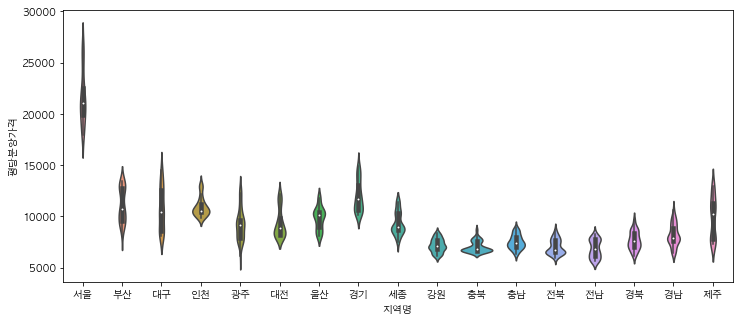

In [89]:
# 8. 지역별 평당분양가격 violinplot 그리기
plt.figure(figsize=(12,5))
sns.violinplot(data=df, x="지역명", y="평당분양가격")

/Users/gusungju/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gusungju/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gusungju/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gusungju/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gusungju/opt/anaconda3/lib/python3.9/s

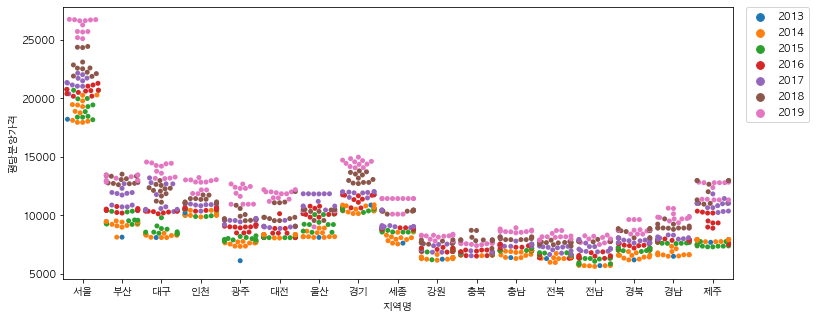

In [91]:
# 8. 지역별 평당분양가격 swarmplot 그리기 
plt.figure(figsize=(12,5))
sns.swarmplot(data=df, x="지역명", y="평당분양가격", hue="연도")
plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad=0.)